<center>

# Football Analytics

Neste notebook iremos explorar dados gratuitos disponibilizados pelo StatsBomb.  

## IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

In [1]:
# Importando Bibliotecas necessárias
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from urllib.request import urlopen
from mplsoccer import Sbopen, Pitch, FontManager, VerticalPitch, add_image
from PIL import Image
from statsbombpy import sb

In [2]:
# Ajustar as configurações de exibição do pandas
pd.set_option('display.max_columns', None)  # None permite mostrar todas as colunas

## EXTRAINDO AS COMPETIÇÕES E TEMPORADAS DISPONÍVEIS

In [3]:
competitions = sb.competitions()
competitions.head(3)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825


In [4]:
# Criando uma lista com todas competições e seus respectivos ids, ordenadas de forma alfabética
competitions_list = competitions[['competition_name', 'competition_id']].drop_duplicates().reset_index(drop=True)

competitions_list

,competition_name,competition_id
0,1. Bundesliga,9
1,African Cup of Nations,1267
2,Champions League,16
3,Copa America,223
4,Copa del Rey,87
5,FA Women's Super League,37
6,FIFA U20 World Cup,1470
7,FIFA World Cup,43
8,Indian Super league,1238
9,La Liga,11


In [5]:
# Criando uma lista com todas as temporadas listadas da mais recente para a mais antiga
seasons_list = competitions[['season_name', 'season_id']].sort_values(by='season_name', ascending=False).drop_duplicates().reset_index(drop=True)

seasons_list

,season_name,season_id
0,2024,282
1,2023/2024,281
2,2023,107
3,2022/2023,235
4,2022,106
5,2021/2022,108
6,2020/2021,90
7,2020,43
8,2019/2020,42
9,2019,30


## SELECIONANDO COMPETIÇÃO E TEMPORADA

In [6]:
# Altere o id da competição e da temporada conforme desejar observando as listagens acima
campeonato = sb.matches(competition_id=43, season_id=106)
campeonato.head(3)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,available,2023-02-17T23:45:15.306706,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,available,2023-07-30T07:46:05.382784,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,available,2023-04-28T17:13:10.958725,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2


In [7]:
# checando a escrita exata de cada equipe
campeonato['home_team'].sort_values().unique()

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon',
       'Canada', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England',
       'France', 'Germany', 'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco',
       'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Senegal', 'Serbia', 'South Korea', 'Spain', 'Switzerland',
       'Tunisia', 'United States', 'Uruguay', 'Wales'], dtype=object)

## SELECIONANDO EQUIPE 

In [8]:
# Filtrando partidas de uma seleção específica (Selecione a equipe que desejar)

equipe = 'Croatia'
df_partidas = campeonato.loc[(campeonato['home_team'] == f'{equipe}')|(campeonato['away_team'] == f'{equipe}')]
df_partidas.head(3)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
18,3869684,2022-12-17,17:00:00.000,International - FIFA World Cup,2022,Croatia,Morocco,2,1,available,available,2023-02-20T08:56:30.908564,2023-04-26T22:18:59.308194,7,3rd Place Final,Sheikh Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Zlatko Dalić,Hoalid Regragui,1.1.0,2,2
19,3869519,2022-12-13,21:00:00.000,International - FIFA World Cup,2022,Argentina,Croatia,3,0,available,available,2023-04-19T06:53:52.197711,2023-04-26T22:32:37.808359,6,Semi-finals,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Zlatko Dalić,1.1.0,2,2
22,3869420,2022-12-09,17:00:00.000,International - FIFA World Cup,2022,Croatia,Brazil,1,1,available,available,2023-04-19T06:28:33.041249,2023-04-26T23:04:13.569501,5,Quarter-finals,Education City Stadium,Michael Oliver,Zlatko Dalić,Telê Santana da Silva,1.1.0,2,2


In [9]:
# Extarindo a lista de jogos da equipe selecionada
jogos_ids = df_partidas['match_id'].unique().tolist()
jogos_ids

[3869684, 3869519, 3869420, 3869219, 3857296, 3857281, 3857277]

In [10]:
# Inicializar o parser
parser = Sbopen()

# Listas para armazenar os dataframes
all_df = []
all_related = []
all_freeze = []
all_tactics = []

# Iterar sobre cada ID de jogo e coletar os dados
for jogo in jogos_ids:
    df, related, freeze, tactics = parser.event(jogo)
    
    # Adicionar os dataframes coletados às listas correspondentes
    all_df.append(df)
    all_related.append(related)
    all_freeze.append(freeze)
    all_tactics.append(tactics)

df_combined = pd.concat(all_df, ignore_index=True)
related_combined = pd.concat(all_related, ignore_index=True)
freeze_combined = pd.concat(all_freeze, ignore_index=True)
tactics_combined = pd.concat(all_tactics, ignore_index=True)

In [11]:
# df contendo todos os jogos da equipe selecionada
df_combined.sample(3)

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,outcome_id,outcome_name,under_pressure,out,aerial_won,ball_recovery_recovery_failure,pass_cross,counterpress,technique_id,technique_name,foul_won_defensive,off_camera,pass_switch,pass_assisted_shot_id,pass_goal_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,goalkeeper_position_id,goalkeeper_position_name,shot_one_on_one,pass_shot_assist,shot_first_time,pass_no_touch,block_offensive,foul_committed_advantage,foul_won_advantage,dribble_nutmeg,dribble_overrun,injury_stoppage_in_chain,substitution_replacement_id,substitution_replacement_name,pass_deflected,bad_behaviour_card_id,bad_behaviour_card_name,foul_committed_card_id,foul_committed_card_name,foul_committed_penalty,foul_won_penalty,ball_recovery_offensive,pass_cut_back,pass_miscommunication,foul_committed_offensive,shot_deflected,block_deflection,half_start_late_video_start,dribble_no_touch,shot_redirect,block_save_block
10518,9b6f0862-5eeb-42f1-9c53-bd6e97c8bd18,3153,2,00:28:12.429000,73,12,135,NaN,3869420,42,Ball Receipt,781,Brazil,1,Regular Play,781,Brazil,None,4320.0,Neymar da Silva Santos Junior,19.0,Center Attacking Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.4,28.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1023,28c2eaab-035f-407e-b5f1-251c2eb14665,1024,1,00:26:43.936000,26,43,47,0.989582,3869684,30,Pass,785,Croatia,1,Regular Play,785,Croatia,None,5474.0,Ivan Perišić,6.0,Left Back,33018.0,Joško Gvardiol,11.810589,1.133658,1.0,Ground Pass,40.1,36.5,38.0,Left Foot,NaN,NaN,35.1,25.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12657,aa306e1f-c370-4e62-b760-becef2af5c5a,147,1,00:04:16.749000,4,16,8,1.831316,3869219,30,Pass,785,Croatia,4,From Throw In,785,Croatia,None,29163.0,Josip Juranović,2.0,Right Back,3471.0,Dejan Lovren,28.536469,-2.051684,1.0,Ground Pass,42.8,50.1,40.0,Right Foot,NaN,NaN,56.0,75.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Extraindo os nomes das ações que podem ser analisadas
df_combined['type_name'].sort_values().unique()

array(['50/50', 'Bad Behaviour', 'Ball Receipt', 'Ball Recovery', 'Block',
       'Carry', 'Clearance', 'Dispossessed', 'Dribble', 'Dribbled Past',
       'Duel', 'Error', 'Foul Committed', 'Foul Won', 'Goal Keeper',
       'Half End', 'Half Start', 'Injury Stoppage', 'Interception',
       'Miscontrol', 'Offside', 'Pass', 'Player Off', 'Player On',
       'Pressure', 'Referee Ball-Drop', 'Shield', 'Shot', 'Starting XI',
       'Substitution', 'Tactical Shift'], dtype=object)

# Fouls committed in each third

Croatia
total de faltas: 101
faltas no primeiro terço: 21
faltas no segundo terço: 43
faltas no terceiro terço: 37


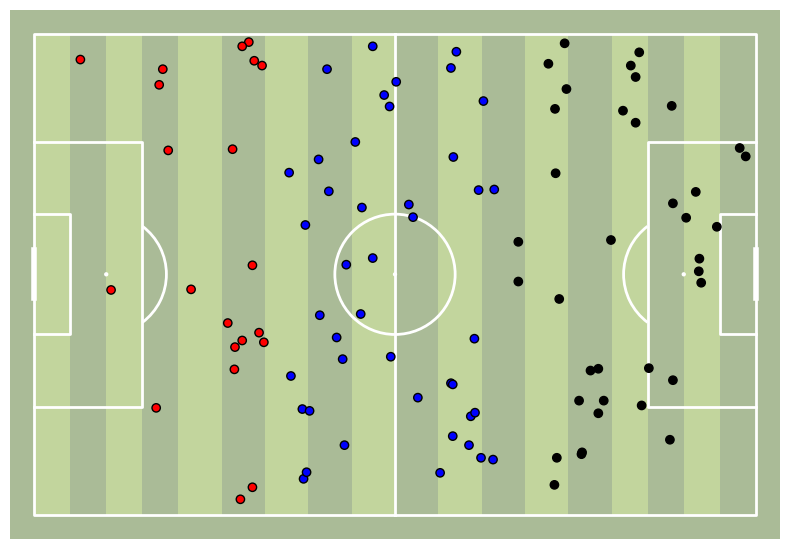

In [14]:
print(equipe)

df_filtered_team = df_combined[df_combined.team_name == equipe]
df_foul_commited = df_filtered_team[df_filtered_team.type_name == 'Foul Committed' ]
print('total de faltas:', len(df_foul_commited))

pitch = Pitch(pitch_color='#aabb97', line_color='white', stripe_color='#c2d59d', stripe=True)

first_third_fouls = df_foul_commited[df_foul_commited['x'] <= 40]
second_third_fouls = df_foul_commited[(df_foul_commited['x'] > 40) & (df_foul_commited['x'] <= 80)]
third_third = df_foul_commited[df_foul_commited['x'] > 80 ]

print('faltas no primeiro terço:', len(first_third_fouls))
print('faltas no segundo terço:', len(second_third_fouls))
print('faltas no terceiro terço:', len(third_third))

# Definindo as cores com base no terço do campo
cores = []
for _, row in df_foul_commited.iterrows():
    if row['x'] <= 40:
        cores.append('#FF0000')  # Vermelho para o primeiro terço (defensivo)
    elif 40 < row['x'] <= 80:
        cores.append('#0000FF')  # Azul para o segundo terço (meio-campo)
    else:
        cores.append('#000000')  # Preto para o último terço (ofensivo)


fig, ax = pitch.draw(figsize=(8, 6))
scatter = pitch.scatter(df_foul_commited.x, df_foul_commited.y, ax=ax, edgecolor='black', color=cores)
plt.show()